In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('dim_claims.csv')
df

,dim_claim_id,bin,drug,reject_code,pharmacy_claim_approved
0,1,417380,A,75.0,0
1,2,999001,A,NaN,1
2,3,417740,A,76.0,0
3,4,999001,A,NaN,1
4,5,417740,A,NaN,1
...,...,...,...,...,...
1335571,1335572,417740,C,75.0,0
1335572,1335573,999001,C,NaN,1
1335573,1335574,417380,C,70.0,0
1335574,1335575,999001,C,NaN,1


In [3]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 440F-93DA

 Directory of C:\Users\huizh\OneDrive\??\HuiZhang\CoverMyMeds_data-20210514T175033Z-001\CoverMyMeds_data

05/21/2021  12:34 PM    <DIR>          .
05/21/2021  12:34 PM    <DIR>          ..
05/21/2021  10:56 AM    <DIR>          .ipynb_checkpoints
03/23/2021  09:58 AM        21,040,923 bridge.csv
05/21/2021  12:33 PM            20,185 CMM PA prediction draft Katherine.ipynb
05/21/2021  12:34 PM           101,100 CMM project claims prediction Katherine draft1 .ipynb
03/30/2021  07:14 AM             2,310 DataDictionary.txt
03/23/2021  09:58 AM        28,271,626 dim_claims.csv
03/23/2021  09:57 AM            50,599 dim_date.csv
03/23/2021  09:58 AM         8,228,234 dim_pa.csv
               7 File(s)     57,714,977 bytes
               3 Dir(s)  367,616,696,320 bytes free


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1335576 entries, 0 to 1335575
Data columns (total 5 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   dim_claim_id             1335576 non-null  int64  
 1   bin                      1335576 non-null  int64  
 2   drug                     1335576 non-null  object 
 3   reject_code              555951 non-null   float64
 4   pharmacy_claim_approved  1335576 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 50.9+ MB


In [5]:
df = df.drop(['reject_code','dim_claim_id'], axis= 1)

df


,bin,drug,pharmacy_claim_approved
0,417380,A,0
1,999001,A,1
2,417740,A,0
3,999001,A,1
4,417740,A,1
...,...,...,...
1335571,417740,C,0
1335572,999001,C,1
1335573,417380,C,0
1335574,999001,C,1


<AxesSubplot:xlabel='pharmacy_claim_approved', ylabel='count'>

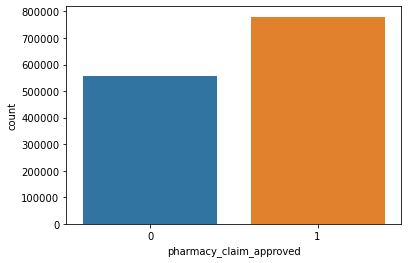

In [6]:
sns.countplot(x= 'pharmacy_claim_approved', data= df)

<AxesSubplot:xlabel='pharmacy_claim_approved', ylabel='count'>

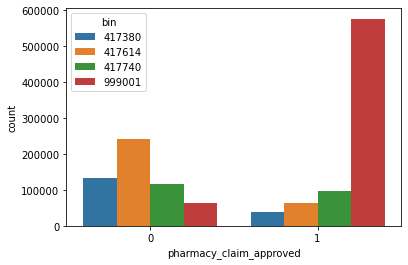

In [7]:
sns.countplot(x= 'pharmacy_claim_approved', hue = 'bin', data= df)

<AxesSubplot:xlabel='pharmacy_claim_approved', ylabel='count'>

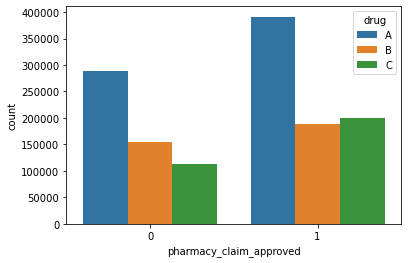

In [8]:
sns.countplot(x= 'pharmacy_claim_approved', hue = 'drug', data= df)

In [9]:
df = pd.get_dummies(df, columns= ['bin'])
df


,drug,pharmacy_claim_approved,bin_417380,bin_417614,bin_417740,bin_999001
0,A,0,1,0,0,0
1,A,1,0,0,0,1
2,A,0,0,0,1,0
3,A,1,0,0,0,1
4,A,1,0,0,1,0
...,...,...,...,...,...,...
1335571,C,0,0,0,1,0
1335572,C,1,0,0,0,1
1335573,C,0,1,0,0,0
1335574,C,1,0,0,0,1


In [10]:
df = df.drop(['bin_999001'], axis =1)

df


,drug,pharmacy_claim_approved,bin_417380,bin_417614,bin_417740
0,A,0,1,0,0
1,A,1,0,0,0
2,A,0,0,0,1
3,A,1,0,0,0
4,A,1,0,0,1
...,...,...,...,...,...
1335571,C,0,0,0,1
1335572,C,1,0,0,0
1335573,C,0,1,0,0
1335574,C,1,0,0,0


In [11]:
df = pd.get_dummies(df, columns= ['drug'])
df


,pharmacy_claim_approved,bin_417380,bin_417614,bin_417740,drug_A,drug_B,drug_C
0,0,1,0,0,1,0,0
1,1,0,0,0,1,0,0
2,0,0,0,1,1,0,0
3,1,0,0,0,1,0,0
4,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...
1335571,0,0,0,1,0,0,1
1335572,1,0,0,0,0,0,1
1335573,0,1,0,0,0,0,1
1335574,1,0,0,0,0,0,1


In [12]:
df = df.drop(['drug_C'], axis =1)

df


,pharmacy_claim_approved,bin_417380,bin_417614,bin_417740,drug_A,drug_B
0,0,1,0,0,1,0
1,1,0,0,0,1,0
2,0,0,0,1,1,0
3,1,0,0,0,1,0
4,1,0,0,1,1,0
...,...,...,...,...,...,...
1335571,0,0,0,1,0,0
1335572,1,0,0,0,0,0
1335573,0,1,0,0,0,0
1335574,1,0,0,0,0,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1335576 entries, 0 to 1335575
Data columns (total 6 columns):
 #   Column                   Non-Null Count    Dtype
---  ------                   --------------    -----
 0   pharmacy_claim_approved  1335576 non-null  int64
 1   bin_417380               1335576 non-null  uint8
 2   bin_417614               1335576 non-null  uint8
 3   bin_417740               1335576 non-null  uint8
 4   drug_A                   1335576 non-null  uint8
 5   drug_B                   1335576 non-null  uint8
dtypes: int64(1), uint8(5)
memory usage: 16.6 MB


In [14]:
X = df.drop(['pharmacy_claim_approved'], axis =1)
X


,bin_417380,bin_417614,bin_417740,drug_A,drug_B
0,1,0,0,1,0
1,0,0,0,1,0
2,0,0,1,1,0
3,0,0,0,1,0
4,0,0,1,1,0
...,...,...,...,...,...
1335571,0,0,1,0,0
1335572,0,0,0,0,0
1335573,1,0,0,0,0
1335574,0,0,0,0,0


In [15]:
y = df. pharmacy_claim_approved

In [16]:
y


0          0
1          1
2          0
3          1
4          1
          ..
1335571    0
1335572    1
1335573    0
1335574    1
1335575    1
Name: pharmacy_claim_approved, Length: 1335576, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=111,
                                                    stratify=y)


In [18]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()

LR.fit(X_train, y_train)

y_pred = LR.predict(X_test)
y_pred


array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [19]:
from sklearn import metrics
matrix = metrics.confusion_matrix(y_test, y_pred)
print(matrix)


[[110312  28676]
 [ 50723 144183]]


In [20]:
metrics.accuracy_score(y_test, y_pred)


0.7622029745967283

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
DT = DecisionTreeClassifier(criterion= 'entropy')

In [23]:
DT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [24]:
y_pred = DT.predict(X_test)

In [25]:
y_pred

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [26]:
from sklearn import metrics
matrix = metrics.confusion_matrix(y_test, y_pred)
print(matrix)

[[117416  21572]
 [     0 194906]]


In [27]:
metrics.accuracy_score(y_test, y_pred)

0.9353926695298508

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
RF = RandomForestClassifier(criterion= 'entropy', n_estimators= 100)

In [30]:
RF.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [31]:
y_pred = RF.predict(X_test)

In [32]:
y_pred

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [33]:
from sklearn import metrics
matrix = metrics.confusion_matrix(y_test, y_pred)
print(matrix)

[[117416  21572]
 [     0 194906]]


In [34]:
metrics.accuracy_score(y_test, y_pred)

0.9353926695298508

In [35]:
from sklearn.svm import SVC

In [36]:
svcmodel = SVC()
svcmodel.fit(X_train, y_train)
y_pred = svcmodel.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

# SVC took much longer time to run

In [37]:
matrix = metrics.confusion_matrix(y_test, y_pred)
print(matrix)

[[117416  21572]
 [     0 194906]]


In [38]:
metrics.accuracy_score(y_test, y_pred)

0.9353926695298508